# BOOK RECOMMENDER SYSTEM

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd

## Importing Datasets

In [6]:
books=pd.read_csv('Books.csv')
users=pd.read_csv('Users.csv')
ratings=pd.read_csv('Ratings.csv')

C:\Users\saniy\AppData\Local\Temp\ipykernel_18452\3397335393.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [16]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [18]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [20]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [22]:
books.duplicated().sum()

0

In [23]:
ratings.duplicated().sum()

0

In [25]:
users.duplicated().sum()

0

In [28]:
# Top 10 most rated books
top_rated_books = ratings['ISBN'].value_counts().head(10).index
most_rated_books = books[books['ISBN'].isin(top_rated_books)][['ISBN', 'Book-Title']]
most_rated_books = most_rated_books.merge(ratings.groupby("ISBN")["Book-Rating"].count(), on="ISBN")
most_rated_books.rename(columns={"Book-Rating": "Total Ratings"}, inplace=True)
print("\nTop 10 Most Rated Books:")
print(most_rated_books)


Top 10 Most Rated Books:
         ISBN                                       Book-Title  Total Ratings
0  0971880107                                      Wild Animus           2502
1  0671027360                              Angels &amp; Demons            586
2  044023722X                                  A Painted House            647
3  0142001740                          The Secret Life of Bees            615
4  0316666343                        The Lovely Bones: A Novel           1295
5  0312195516              The Red Tent (Bestselling Backlist)            723
6  0385504209                                The Da Vinci Code            883
7  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel            732
8  067976402X                           Snow Falling on Cedars            614


C:\Users\saniy\AppData\Local\Temp\ipykernel_18452\2914925323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')


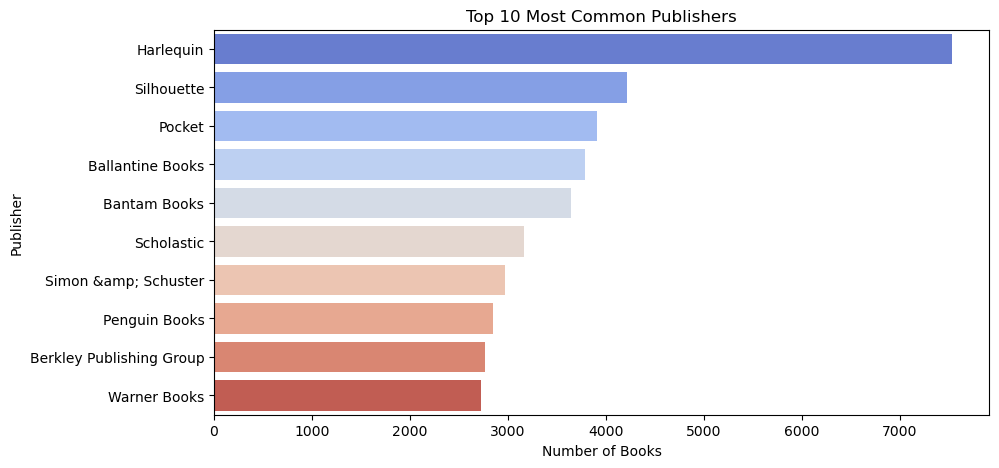

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Most common publishers
top_publishers = books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')
plt.title("Top 10 Most Common Publishers")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()

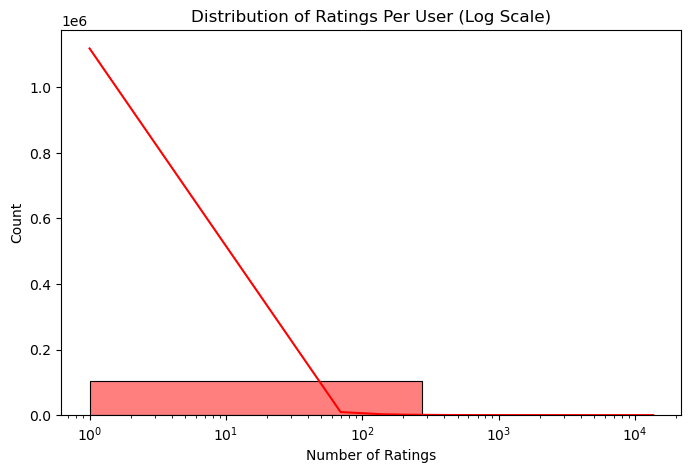

In [31]:
# Ratings per user distribution
ratings_per_user = ratings['User-ID'].value_counts()
plt.figure(figsize=(8,5))
sns.histplot(ratings_per_user, bins=50, kde=True, color='red')
plt.xscale('log')
plt.title("Distribution of Ratings Per User (Log Scale)")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.show()

In [32]:
# Summary statistics
print("\nSummary Statistics of Ratings Per User:")
print(ratings_per_user.describe())



Summary Statistics of Ratings Per User:
count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: count, dtype: float64


## Popularity Based Recommender System

In [37]:
ratings_with_name=ratings.merge(books,on='ISBN')

In [39]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [43]:
# First convert Book-Rating to numeric, handling any non-numeric values
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')
# Now calculate the mean
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
# Rename the column
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [45]:
# Step 1: Merge num_ratings and avg_rating
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')

# Step 2: Filter books with 250+ ratings
popular_df = popular_df[popular_df['num_ratings'] >= 250]

# Step 3: Sort and pick top 50
popular_df = popular_df.sort_values('avg_rating', ascending=False).head(50)

# Step 4: Merge with books dataset to get author and image
popular_df = popular_df.merge(books, on='Book-Title')

# Step 5: Drop duplicates and select relevant columns
popular_df = popular_df.drop_duplicates('Book-Title')[
    ['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_rating']
]


In [47]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collabarative Filtering Based Recommender System

In [52]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200
userswhorated=x[x].index

In [53]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(userswhorated)]

In [54]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [58]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [60]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [62]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [64]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [66]:
pt.fillna(0,inplace=True)

In [67]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
similarity_scores=cosine_similarity(pt)

In [74]:
similarity_scores.shape

(706, 706)

In [76]:
def recommend(book_name):
  index=np.where(pt.index==book_name)[0][0]
  similar_items=sorted(list(enumerate(similarity_scores[index])),key= lambda x:x[1],reverse=True)[1:6]
  data=[]
  for i in similar_items:
      item=[]
      temp_df=books[books['Book-Title']==pt.index[i[0]]]
      item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
      item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
      item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
      data.append(item)
  return data


In [78]:
recommend('Message in a Bottle')

[['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Mulberry Tree',
  'Jude Deveraux',
  'http://images.amazon.com/images/P/0743437640.01.MZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['Nightmares &amp; Dreamscapes',
  'Stephen King',
  'http://images.amazon.com/images/P/0451180232.01.MZZZZZZZ.jpg']]

In [80]:
recommend('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['Middlesex: A Novel',
  'Jeffrey Eugenides',
  'http://images.amazon.com/images/P/0312422156.01.MZZZZZZZ.jpg']]

In [89]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [91]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [93]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [181]:
pickle.dump(books,open('books.pkl','wb'))


In [85]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

# Simulated feedback: Actual and predicted (1 = liked, 0 = not liked)
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
Confusion Matrix:
 [[1 1]
 [1 2]]


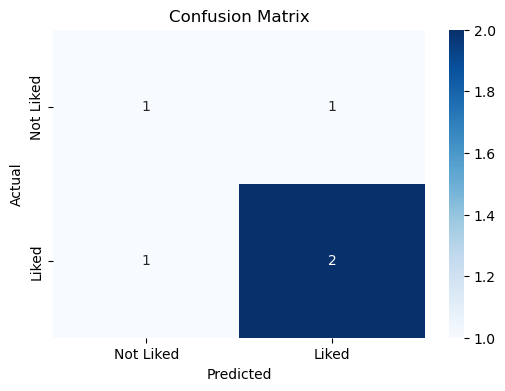

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Actual and predicted labels
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Not Liked', 'Liked']

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
